<font size = "5"> **Chapter 1: [Introduction](CH1_00-Introduction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Matplotlib and Numpy for Micrographs

<font size = "5"> Image-Data Representations in the Computer for Microscopists</font>

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Introduction/CH1_03-Data_Representation.ipynb)

part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2023
<br>
Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


***

## Topic 

All notebooks of this notebook series rely on two core python-packages: [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/)

However,  ``numpy`` and ``matplot`` are a bit confusing of how they are dealing with images from microscopes.

The reason for these problems is that matplotlib is an image **and** a line plotting routine, and those routines are using different conventions of the plotting axis.

The behaviour of these two packages will be explored in this notebook, and the differences of between [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/) have direct impact on how we deal with data, how we store them, and how easily we can use other packages for data analysis.

***

There is only one command necessary to load the functionality of both packages (numpy and matplotlib) which is done in the code cell below. Every notebook in this series will start with that line.

In [1]:
# import matplotlib and numpy with these **magic** commands
#                       use "inline" instead of "notebook" for non-interactive plots
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
%gui qt


## The Problem

An image is stored as a matrix where each element of the matrix is the intensity level of the pixel.

An empty image can easily be made with numpy (``np.zeros`` function)

In [2]:
image = np.zeros((8,4))

#make checkerboard (you can ignore how this is done exactly, the result is important)
image[::2, 1::2] = 1
image[1::2, ::2] = 1
print(image)

[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]


Looks ok.

Let's plot this boring image.

<IPython.core.display.Javascript object>


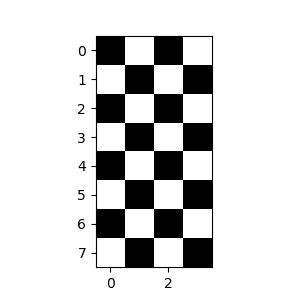

In [3]:
plt.figure(figsize = (3,3))
plt.imshow(image, cmap = plt.cm.gray);

While you probably did not have a problem with the matrix representation of our boring image, you should have one now, because the x-axis was the longer one.

The problem comes from the different way data can be stored.

## Data Storage Conventions

In microscopy, we are used to first go right and then down, like you read a text in English. This may originate in the fact that images from scanning microscopes start at top left, go horizontally first and then down line by line.

So our perception requires the first index to be horizontally (the column index to be first) and the row index to be the second.

In mathematics, a matrix index starts with a row index and column indices are second. Exactly opposite to what we are used in microscopy.


$
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}
$

So we now have to choose, what kind of internal representation we use. And we need to consider what kind of internal representation the used python-packages choose. You will notice that most examples on the internet get around this problem by using square matrices and images, which leads sometimes to errors in non-square data, and leads often to subtle problems in image analysis.

As we see numpy uses the mathematical convention and most popular packages are compatible with numpy and use the same convention. If we chose to internally stay with the fast direction as row in the numpy array, it gets confusing with switching x and y directions constantly. Therefore, ``pyTEMlib``, ``pycroscopy``, and ``pyNSID`` are using the storage method of slow axis first storage convention.

In other words, in the notebooks of this course, we will rotate output and stay with mathematics indexing internally. This makes the computation consistent with all numpy based packages and there are many. The [scipy](https://www.scipy.org/), [scikit-image](https://scikit-image.org/), and [scikit-learn](https://scikit-learn.org/stable/) are the most used (collection of) packages used in this notebook-lecture series. We stay  very ``pythonic`` with this convention.

*Turning* the image can be accomplished by a ``.T`` command of numpy arrays, which is the transposed of a matrix $M^T$. Please note, that numpy is smart enough to leave the stored data alone and just change the way the data are read (look up strides and numpy  for more information).

(8, 4)


<IPython.core.display.Javascript object>


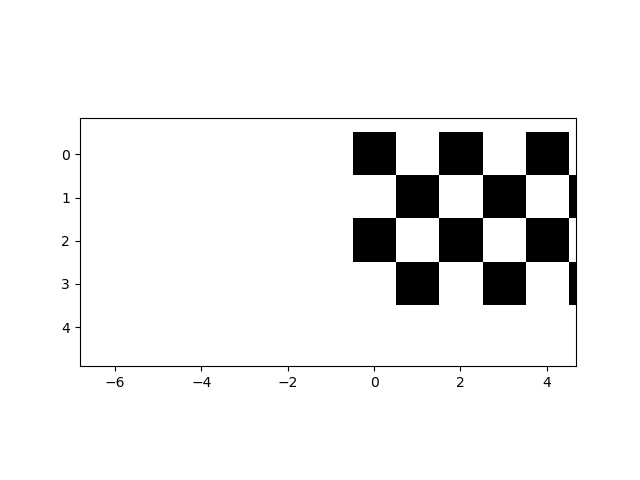

In [4]:
print(image.shape)
plt.figure()
plt.imshow(image.T, cmap = plt.cm.gray);

## Using the ``Pythonic`` Convention

This convention chosen allows us to address the image content naturally, here we select the pixel at x-axis 4 and y-axis 1

In the example below, also a line is plotted which needs the ``x`` coordinates first and the ``y`` coordinates (as a list ``[ ... ]`` or numpy ``array``).

The same coordinates are used  to put markers in the image.

<IPython.core.display.Javascript object>


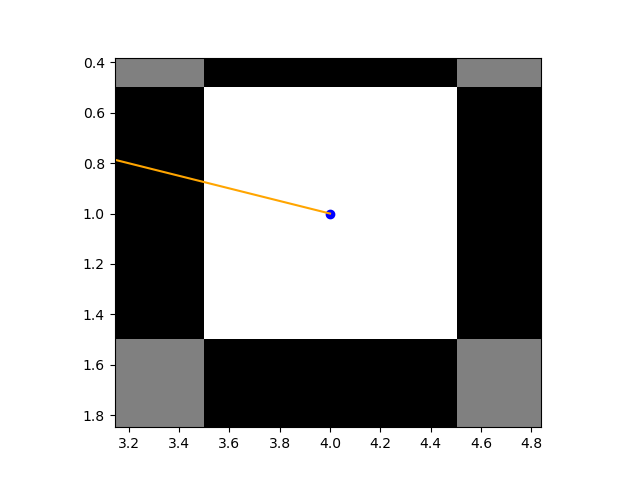

In [5]:
image[4,1] = 2

plt.figure()
plt.imshow(image.T, cmap = plt.cm.gray)
plt.plot([0,4],[0,1], color='orange')
plt.scatter([0,4],[0,1],color='blue');

## Adding a Scale

Adding a scale to the image is accomplished by setting the extent parameters in matplotlib. 

### Relative Scale
Generally, it is recommended to use the field of view (length of axis times pixel-size in that direction) as the extent and the starting point is zero. 

The difference to most online code is that we set the field of view (FOV) of the y-axis first, to start the top left at 0 as it is custom in microscopy.

The pixel size is accurate in that way. Addressing and plotting other parameters on top of the image will be in the scale expressed with the extent parameters.

However, that there is a slight problem with the origin and the coordinate reference of a pixel, which will be discussed in the next subsection.


<IPython.core.display.Javascript object>


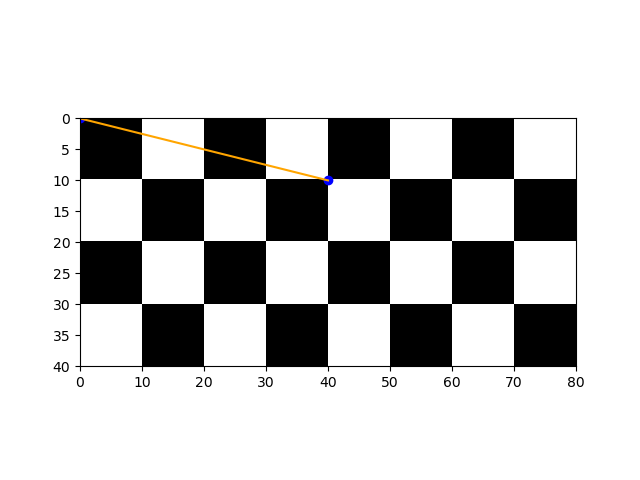

In [6]:
image[4,1] = 1

scale_x = scale_y = 10
FOV_x = image.shape[0]* scale_x
FOV_y = image.shape[1]* scale_y
image_extent = [0,FOV_x,FOV_y, 0]

plt.figure()
plt.imshow(image.T, extent = image_extent, cmap = plt.cm.gray)

plt.plot(np.array([0,4])*scale_x, np.array([0,1])*scale_y, color='orange')
## while above coordinates are translated from pixel, next we use directly image coordinates
plt.scatter([0,40],[0,10],color='blue');

### Correct Absolute Scale

We can see that in the image above the relative scale, which means the size of the pixel, is accurate and the y-axis is numbered as we are used to. 

Plotting a line  from pixel [0,0] to pixel [4,1] however reveals that the origin of the pixels moved from the center to the top left corner. 

This is usually not a problem however it can lead to problems in plotting of parameters with subpixel accuracy, where the origin of the matrix pixel is regarded ``at the center``.

The correct scale needs to be shifted by half a pixel:


<IPython.core.display.Javascript object>


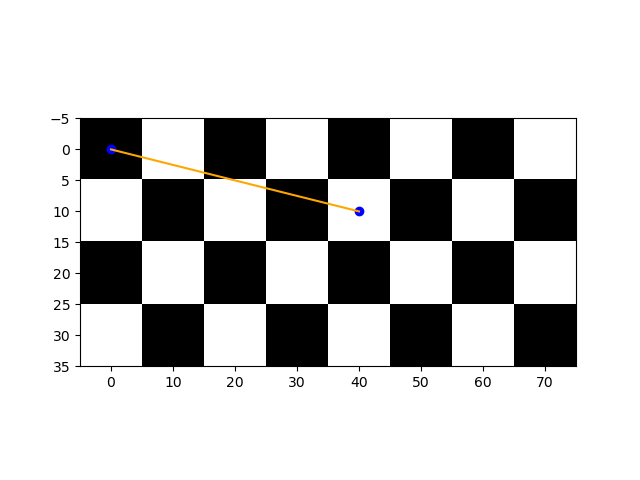

In [7]:
image[4,1] = 1

scale_x = scale_y = 10
FOV_x = image.shape[0]* scale_x
FOV_y = image.shape[1]* scale_y

## Set correct image extent
image_extent = (np.array([0,image.shape[0],image.shape[1], 0])-0.5)*(scale_x,scale_x,scale_y,scale_y)

plt.figure()
plt.imshow(image.T, extent = image_extent, cmap = plt.cm.gray)

plt.plot(np.array([0,4])*scale_x, np.array([0,1])*scale_y, color='orange')
## while above coordinates are translated from pixel here we use directly image coordinates
plt.scatter([0,40],[0,10],color='blue'); 

## Summary

So internally we use the mathematical convention of matrices and all we have to take care of is that the output plot of the image is the right kind around. 

For absolute pixel positions we need to shift the ``grid`` by half a pixel to keep the pixel origin in the center of the pixels.

The advantage of this approach is that no other effort has to be spent to keep track on what axis is where, which can get cumbersome in multidimensional datasets.

## Navigation
- <font size = "3">  **Back  [Installation and Prerequisites](CH1_02-Prerequisites.ipynb))** </font>
- <font size = "3">  **Next: [Open a (DM) file ](CH1_04-Open_File.ipynb)** </font>
- <font size = "3">  **Chapter 1: [Introduction](CH1_00-Introduction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
